In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("message_commit_diffs_with_rectified_message.csv")
dataframe.head()

,Hash,Message,Filename,Source Code (before),Source Code (after),Diff,LLM Inference (fix type),Rectified Message
0,c9832a76f6af231bffde5209ae0b0377be8d6a45,fix: add default config for torch optimizer\n\...,naf.py,"""""""Continuous Q-Learning with Normalized Advan...","""""""Continuous Q-Learning with Normalized Advan...","@@ -13,6 +13,8 @@ DEFAULT_CONFIG = with_common...",add default config for torch optimizer,add default config for torch optimizernodeliff
1,570441605fd5982d557fa673596f7572e4f3e9bb,fix(naf): disable gradient computation in comp...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -42,8 +42,9 @@ class NAFTorchPolicy(Policy)...",fix missing torch.no_grad() in naf,fix missing torch.no_grad() in naforchpolicy
2,265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6,fix(td3): check if horizon is None\n\nSigned-o...,ddpg_policy.py,"""""""Updated DDPG policy with Partial Episode Bo...","""""""Updated DDPG policy with Partial Episode Bo...","@@ -5,14 +5,17 @@ from ray.rllib.agents.ddpg i...",fix postprocessing of sample batches,fix postprocessing of sample batches
3,60fc408c34db933570397e6a919429067de83e27,fix(naf): return info dict with loss computati...,naf_policy.py,"""""""NAF policy class using PyTorch.""""""\nimport ...","""""""NAF policy class using PyTorch.""""""\nimport ...","@@ -101,7 +101,7 @@ class NAFTorchPolicy(Polic...",fix missing default config,fix missing default config
4,aa154c5c82be0b16c5cfcf03a8db91058cf03a40,fix(tests): return scalar reward in MockEnv\n\...,mock_env.py,"""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","""""""Dummy gym.Env subclasses.""""""\nimport gym\nf...","@@ -21,4 +21,4 @@ class MockEnv(gym.Env): # p...",fix test_gym_env_test.py,fix test_gym_env_test.py


In [3]:
print(f"Number of commits made : {len(dataframe['Hash'].unique())}")
print(f"Number of files changed over all commits : {len(dataframe['Filename'].unique())}")
print(f"Average number of files changed per commit : {len(dataframe)/len(dataframe['Hash'].unique())}")


Number of commits made : 385
Number of files changed over all commits : 223
Average number of files changed per commit : 1.7272727272727273


In [4]:
print(f"Distribution of fix types : \n{dataframe['LLM Inference (fix type)'].apply(lambda x: x.split()[0]).value_counts()}")

Distribution of fix types : 
LLM Inference (fix type)
fix         400
add         252
update        7
skip          4
raise         1
increase      1
Name: count, dtype: int64


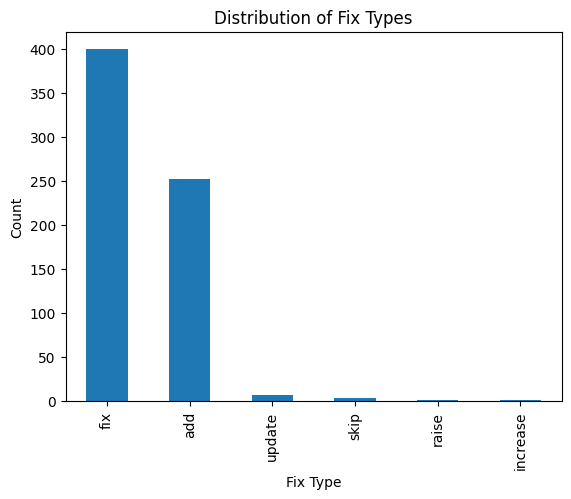

In [5]:
dataframe['LLM Inference (fix type)'].apply(lambda x: x.split()[0]).value_counts().plot(kind='bar')
plt.title("Distribution of Fix Types") 
plt.xlabel("Fix Type")
plt.ylabel("Count")
plt.show()

In [6]:
print(f" Distribution of modified filenames : \n {dataframe['Filename'].value_counts()}")

 Distribution of modified filenames : 
 Filename
trainer.py                 46
policy.py                  23
torch_policy.py            13
mapo_policy.py             12
off_policy.py              11
                           ..
solver.py                   1
warmup.py                   1
test_off_policy.py          1
builders.py                 1
optimizer_collection.py     1
Name: count, Length: 223, dtype: int64


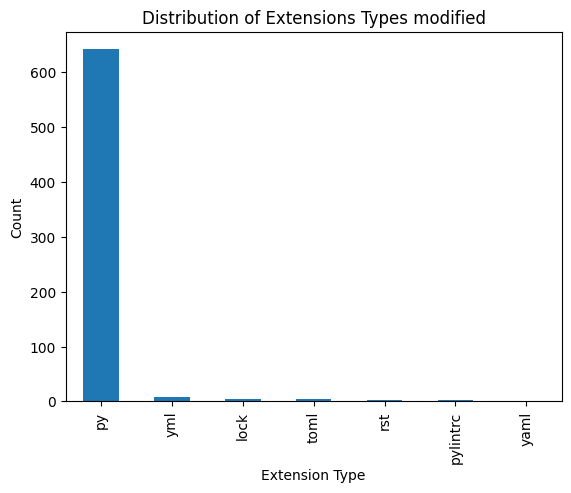

In [7]:
dataframe['Filename'].apply(lambda x: x.split(".")[-1]).value_counts().plot(kind='bar')
plt.title("Distribution of Extensions Types modified") 
plt.xlabel("Extension Type")
plt.ylabel("Count")
plt.show()

In [8]:
import radon
from radon.complexity import cc_visit

In [ ]:
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze

def avg_complexity(code):
    if pd.isna(code) or not isinstance(code, str) or len(code.strip()) == 0:
        return 0
    code = code.replace("\\", "\\\\")
    try:
        results = cc_visit(code)
        if not results:
            return 0
        return sum(r.complexity for r in results) / len(results)
    except:
        return 0

def maintainability_index(code):
    if pd.isna(code) or not isinstance(code, str) or len(code.strip()) == 0:
        return 0
    code = code.replace("\\", "\\\\")
    try:
        return mi_visit(code, True)
    except:
        return 0

def loc_count(code):
    if pd.isna(code) or not isinstance(code, str) or len(code.strip()) == 0:
        return 0
    code = code.replace("\\", "\\\\")
    try:
        return analyze(code).loc
    except:
        return 0

mi_before  = dataframe["Source Code (before)"].apply(maintainability_index)
mi_after   = dataframe["Source Code (after)"].apply(maintainability_index)

cc_before  = dataframe["Source Code (before)"].apply(avg_complexity)
cc_after   = dataframe["Source Code (after)"].apply(avg_complexity)

loc_before = dataframe["Source Code (before)"].apply(loc_count)
loc_after  = dataframe["Source Code (after)"].apply(loc_count)
dataframe["MI_Change"]  = mi_after - mi_before
dataframe["CC_Change"]  = cc_after - cc_before
dataframe["LOC_Change"] = loc_after - loc_before

print(dataframe.head())


                                       Hash  \
0  c9832a76f6af231bffde5209ae0b0377be8d6a45   
1  570441605fd5982d557fa673596f7572e4f3e9bb   
2  265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6   
3  60fc408c34db933570397e6a919429067de83e27   
4  aa154c5c82be0b16c5cfcf03a8db91058cf03a40   

                                             Message        Filename  \
0  fix: add default config for torch optimizer\n\...          naf.py   
1  fix(naf): disable gradient computation in comp...   naf_policy.py   
2  fix(td3): check if horizon is None\n\nSigned-o...  ddpg_policy.py   
3  fix(naf): return info dict with loss computati...   naf_policy.py   
4  fix(tests): return scalar reward in MockEnv\n\...     mock_env.py   

                                Source Code (before)  \
0  """Continuous Q-Learning with Normalized Advan...   
1  """NAF policy class using PyTorch."""\nimport ...   
2  """Updated DDPG policy with Partial Episode Bo...   
3  """NAF policy class using PyTorch."""\nimport ...   
4  "

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")


def get_embedding(code):
    if pd.isna(code) or not isinstance(code, str) or len(code.strip()) == 0:
        return torch.zeros(768)  
    inputs = tokenizer(code, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embedding

def cosine_similarity(vec1, vec2):
    if torch.norm(vec1) == 0 or torch.norm(vec2) == 0:
        return 0.0
    return torch.nn.functional.cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0)).item()

def bleu_similarity(code1, code2):
    if pd.isna(code1) or pd.isna(code2) or not isinstance(code1, str) or not isinstance(code2, str):
        return 0.0
    ref_tokens = code1.split()
    cand_tokens = code2.split()
    smoothie = SmoothingFunction().method4
    return sentence_bleu([ref_tokens], cand_tokens, smoothing_function=smoothie)

semantic_sims = []
token_sims = []

for before, after in zip(dataframe["Source Code (before)"], dataframe["Source Code (after)"]):
    emb_before = get_embedding(before)
    emb_after = get_embedding(after)

    semantic_sims.append(cosine_similarity(emb_before, emb_after))
    token_sims.append(bleu_similarity(before, after))

dataframe["Semantic_Similarity"] = semantic_sims
dataframe["Token_Similarity"] = token_sims

print(dataframe.head())


c:\MYSTUFF\Academics\STT\Lab 2\sttl2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                       Hash  \
0  c9832a76f6af231bffde5209ae0b0377be8d6a45   
1  570441605fd5982d557fa673596f7572e4f3e9bb   
2  265fc2e1faaf5ba4d9effcc7eb4fdf16fa14c5d6   
3  60fc408c34db933570397e6a919429067de83e27   
4  aa154c5c82be0b16c5cfcf03a8db91058cf03a40   

                                             Message        Filename  \
0  fix: add default config for torch optimizer\n\...          naf.py   
1  fix(naf): disable gradient computation in comp...   naf_policy.py   
2  fix(td3): check if horizon is None\n\nSigned-o...  ddpg_policy.py   
3  fix(naf): return info dict with loss computati...   naf_policy.py   
4  fix(tests): return scalar reward in MockEnv\n\...     mock_env.py   

                                Source Code (before)  \
0  """Continuous Q-Learning with Normalized Advan...   
1  """NAF policy class using PyTorch."""\nimport ...   
2  """Updated DDPG policy with Partial Episode Bo...   
3  """NAF policy class using PyTorch."""\nimport ...   
4  "

In [ ]:
semantic_threshold = 0.80
token_threshold = 0.75

def classify_semantic(score):
    return "Minor" if score >= semantic_threshold else "Major"

def classify_token(score):
    return "Minor" if score >= token_threshold else "Major"

dataframe["Semantic_class"] = dataframe["Semantic_Similarity"].apply(classify_semantic)
dataframe["Token_class"]    = dataframe["Token_Similarity"].apply(classify_token)
dataframe["Classes_Agree"] = dataframe.apply(
    lambda row: "YES" if row["Semantic_class"] == row["Token_class"] else "NO",
    axis=1
)   

print(dataframe[["Semantic_Similarity", "Token_Similarity", 
                 "Semantic_class", "Token_class", "Classes_Agree"]].head())


   Semantic_Similarity  Token_Similarity Semantic_class Token_class  \
0             0.999315          0.964999          Minor       Minor   
1             1.000000          0.984087          Minor       Minor   
2             0.999236          0.697790          Minor       Major   
3             1.000000          0.990167          Minor       Minor   
4             0.999736          0.965139          Minor       Minor   

  Classes_Agree  
0           YES  
1           YES  
2            NO  
3           YES  
4           YES  


In [14]:
dataframe['Classes_Agree'].value_counts()

Classes_Agree
YES    618
NO      47
Name: count, dtype: int64

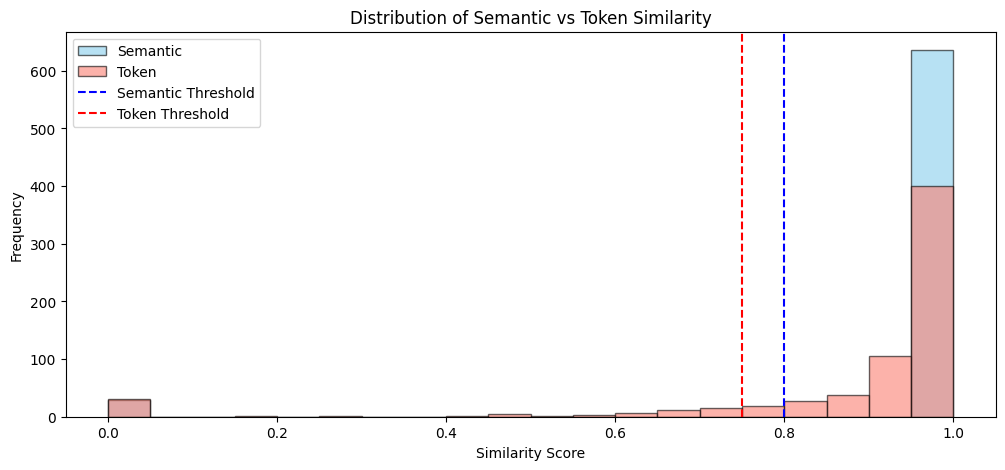

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.hist(dataframe["Semantic_Similarity"], bins=20, alpha=0.6, label="Semantic", color="skyblue", edgecolor="black")
plt.hist(dataframe["Token_Similarity"], bins=20, alpha=0.6, label="Token", color="salmon", edgecolor="black")

plt.axvline(0.80, color="blue", linestyle="--", label="Semantic Threshold")
plt.axvline(0.75, color="red", linestyle="--", label="Token Threshold")

plt.title("Distribution of Semantic vs Token Similarity")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
dataframe.to_csv("output_sims.csv", index=False)

In [ ]:
semantic_counts = dataframe["Semantic_class"].value_counts()
token_counts = dataframe["Token_class"].value_counts()

print("Semantic Similarity Classification Counts:")
print(semantic_counts)  
print("\nToken Similarity Classification Counts:")
print(token_counts)


Semantic Similarity Classification Counts:
Semantic_class
Minor    636
Major     29
Name: count, dtype: int64

Token Similarity Classification Counts:
Token_class
Minor    589
Major     76
Name: count, dtype: int64


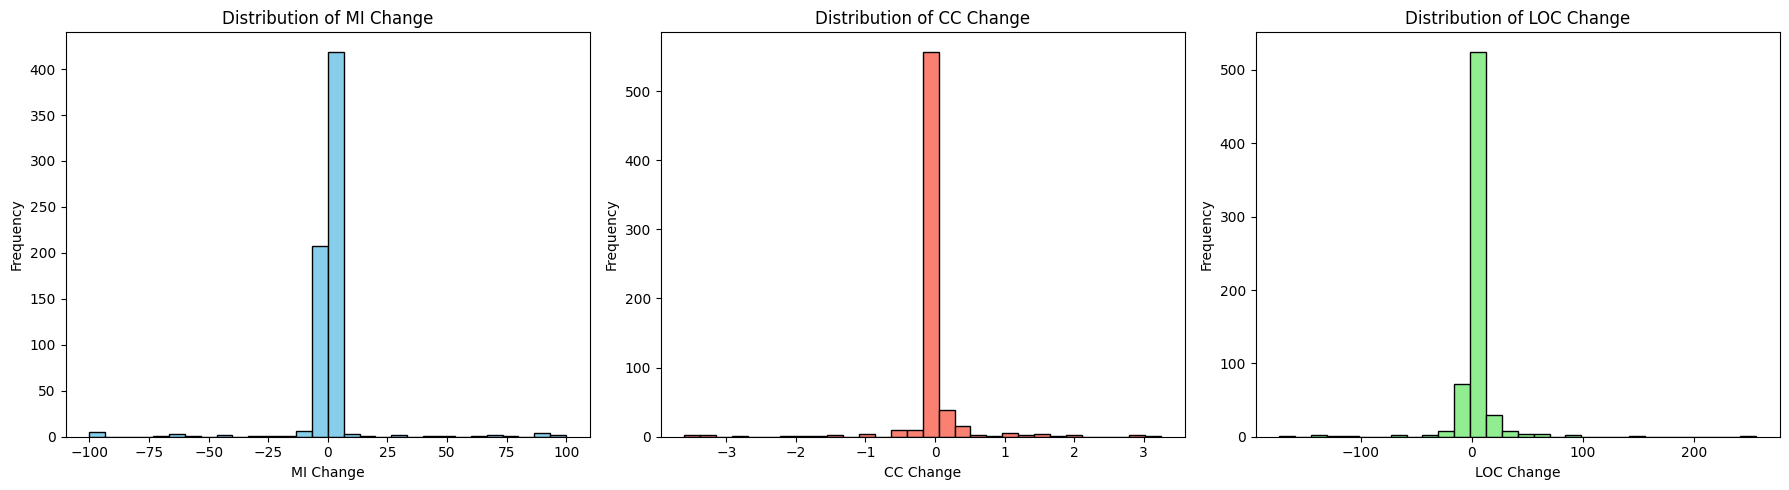

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(dataframe["MI_Change"], bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of MI Change")
axes[0].set_xlabel("MI Change")
axes[0].set_ylabel("Frequency")

axes[1].hist(dataframe["CC_Change"], bins=30, color="salmon", edgecolor="black")
axes[1].set_title("Distribution of CC Change")
axes[1].set_xlabel("CC Change")
axes[1].set_ylabel("Frequency")

axes[2].hist(dataframe["LOC_Change"], bins=30, color="lightgreen", edgecolor="black")
axes[2].set_title("Distribution of LOC Change")
axes[2].set_xlabel("LOC Change")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

